In [3]:
!pip install statsmodels

In [5]:
import pandas as pd 
import numpy as np
from random import randrange
from pandas import Series
from matplotlib import pyplot
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
series = [i+randrange(10) for i in range(1,100)]

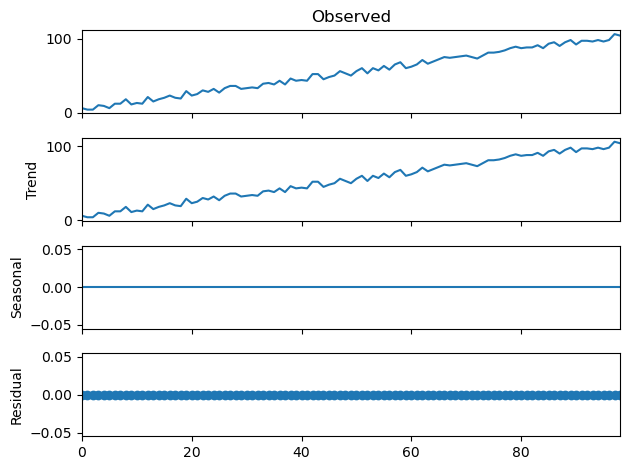

In [8]:
result = seasonal_decompose(series, model='additive', period=1)
result.plot()
pyplot.show()

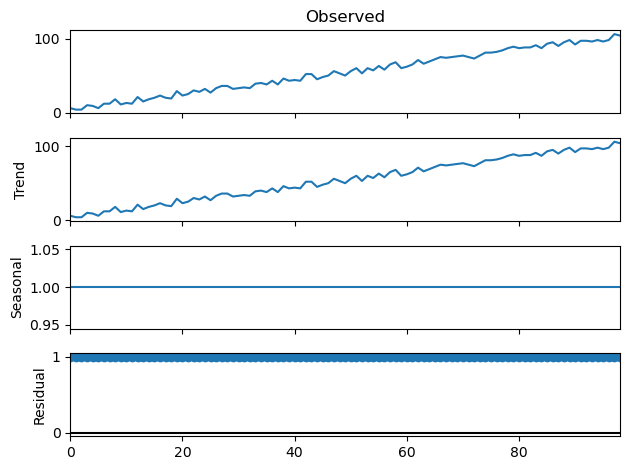

In [9]:
series_2 = [i**2.0 for i in range(1,100)]
result_2 = seasonal_decompose(series, model='multiplicative', period=1)
result_2.plot()
pyplot.show()

In [11]:
df = pd.read_csv('airline-passengers_data.csv')
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


<Axes: xlabel='Month'>

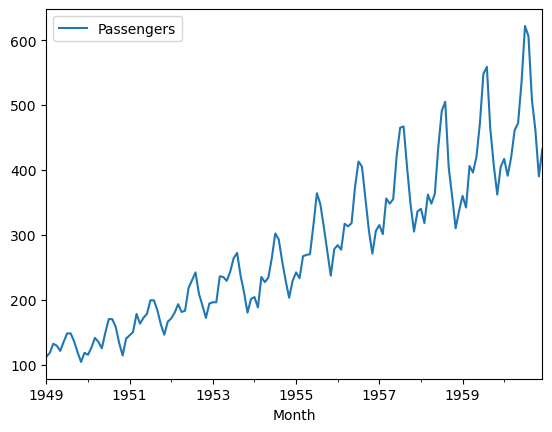

In [12]:
df.set_index('Month', inplace=True)
df.index = pd.to_datetime(df.index)
df.dropna(inplace=True)
df.plot()

In [13]:
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [14]:
result_air = seasonal_decompose(df['Passengers'], model= 'additive', period=12)

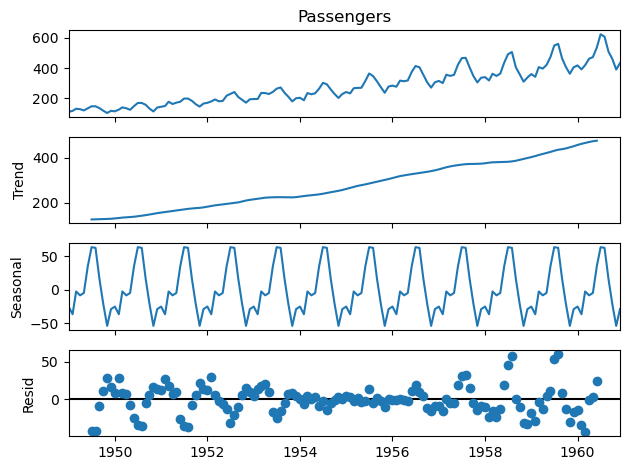

In [15]:
result_air.plot()
pyplot.show()

<Axes: xlabel='Month'>

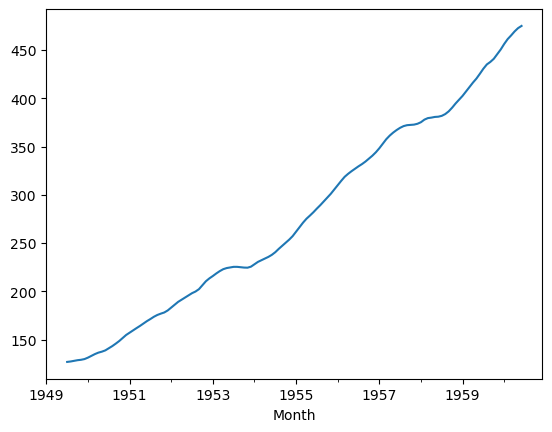

In [16]:
result_air.trend.plot()

<Axes: xlabel='Month'>

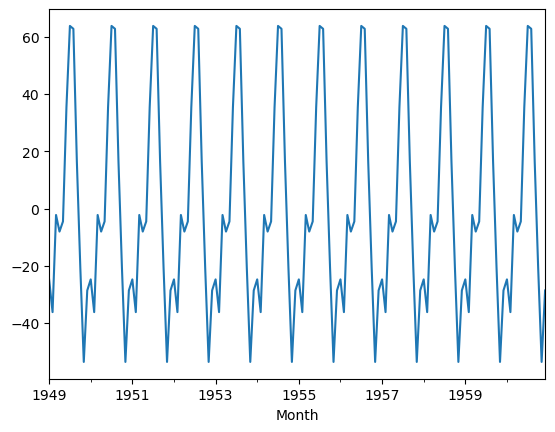

In [17]:
result_air.seasonal.plot()

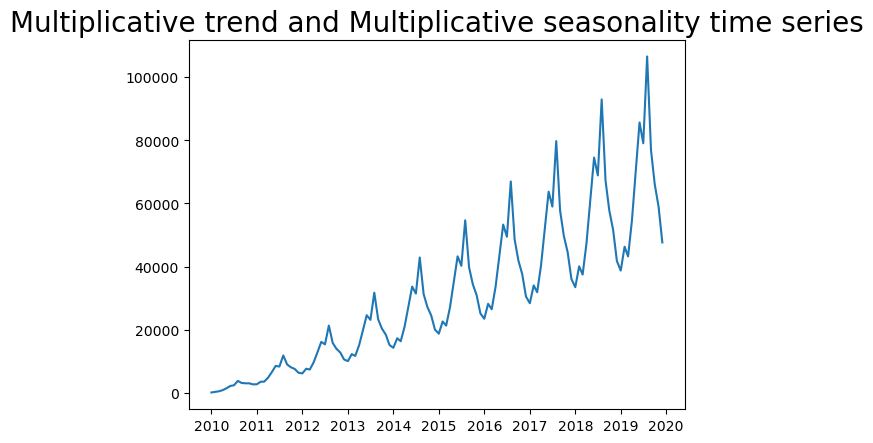

In [18]:
# Single season multiplier factors - for seasonality effect
xs = np.arange(1, 121)
seasonal_multipliers = [110, 130, 120, 150, 190, 230, 210, 280, 200, 170, 150, 120]
# Immitate 10 years of data
x_range = np.arange(1, 121)
# Raise to the 1.25 power to get upwards "curved" trend
x_range = np.array([x**1.25 for x in xs])

time_series = []
# Split to 10 chunks - 1 year each
for chunk in np.split(x_range, 10):
    for i, val in enumerate(chunk):
        # Multiply value with seasonal scalar
        time_series.append(val * seasonal_multipliers[i])
        
# Convert to DataFrame
df_mm = pd.DataFrame(
    data={'y': time_series}, 
    index=pd.date_range(start='2010-01-01', freq='MS', periods=120)
)

# Plot
plt.title('Multiplicative trend and Multiplicative seasonality time series', size=20)
plt.plot(df_mm);

In [21]:
df_mm

,y
2010-01-01,110.000000
2010-02-01,309.193850
2010-03-01,473.786645
2010-04-01,848.528137
2010-05-01,1420.581342
...,...
2019-08-01,106593.449774
2019-09-01,76959.515131
2019-10-01,66115.217429
2019-11-01,58955.586044


In [23]:
df_mm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2010-01-01 to 2019-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       120 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


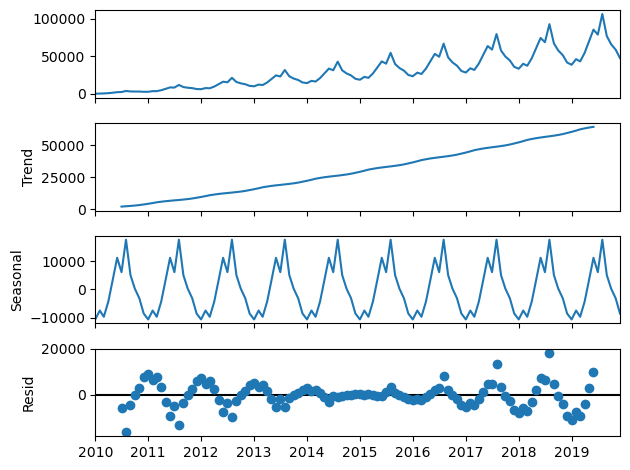

In [19]:
decomposed = seasonal_decompose(df_mm, model='additive')
decomposed.plot();

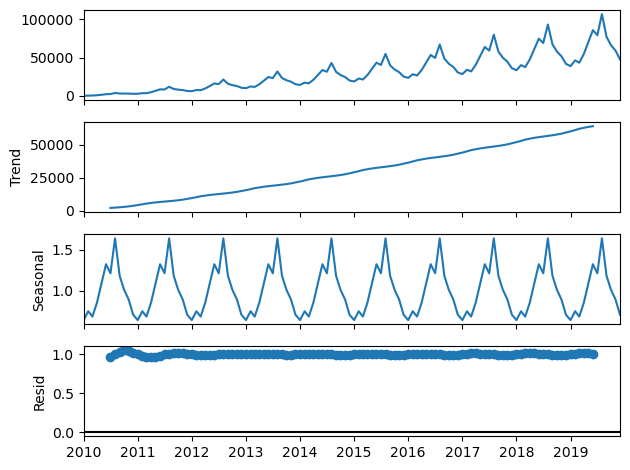

In [20]:
decomposed = seasonal_decompose(df_mm, model='multiplicative')
decomposed.plot();